In [204]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [205]:
train_df = pd.read_csv('database/train.csv', index_col=0)
test_df = pd.read_csv('database/test.csv', index_col=0)
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
ordinal_encoder = ['Class', ]

In [223]:
train_df.iloc[0]

Customer Type                                 Loyal Customer
Age                                                       37
Class                                                    Eco
Flight Distance                                          187
Inflight wifi service                                      2
Departure/Arrival time convenient                          4
Ease of Online booking                                     2
Gate location                                              5
Food and drink                                             4
Online boarding                                            2
Seat comfort                                               4
Inflight entertainment                                     4
On-board service                                           4
Leg room service                                           3
Baggage handling                                           4
Checkin service                                            3
Inflight service        

# Train Test Split

In [206]:
original_train_df = train_df.drop(columns=['id'])
test_df = test_df.drop(columns=['id'])


In [207]:
train_df, validation_df = train_test_split(original_train_df,test_size= 0.25, stratify=original_train_df['satisfaction'])

print('original_train_df: ',len(original_train_df))
print('train_df: ', len(train_df), "validation_df:", len(validation_df))
print('train_df: ', len(train_df)/len(original_train_df), "validation_df:", len(validation_df)/len(original_train_df))

original_train_df:  103904
train_df:  77928 validation_df: 25976
train_df:  0.75 validation_df: 0.25


# Outliers

<Axes: >

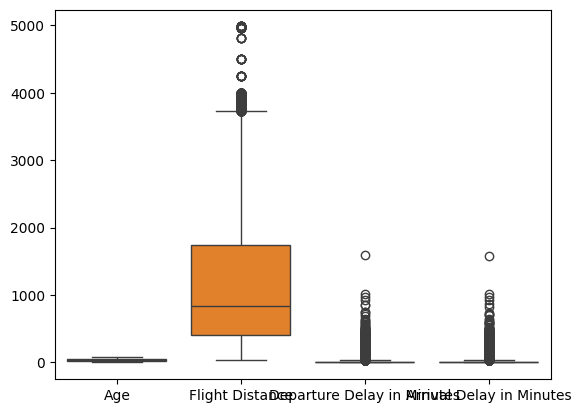

In [208]:
train_df.reset_index(drop=True, inplace=True)

cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

sns.boxplot(data=train_df[cols])

Original DataFrame Shape: (77928, 23)
DataFrame Shape after Removing Outliers: (76207, 23)
Columns with z-score > 3:  ['Age', 'Flight Distance', 'Departure Delay in Minutes']


<Axes: >

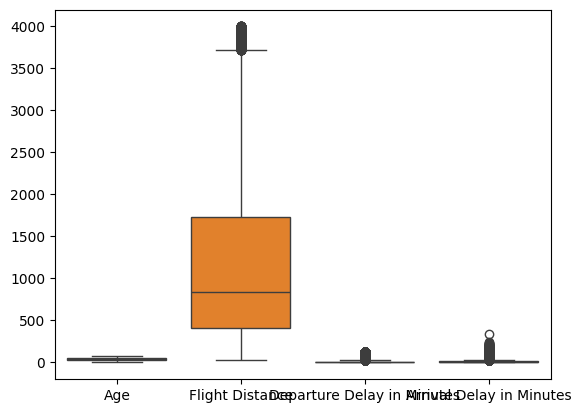

In [209]:
print("Original DataFrame Shape:", train_df.shape)
z_score_col = []
for cl in cols:
    z = np.abs(stats.zscore(train_df[cl]))
    outlier_set = (np.where(z > 3)[0])
    train_df = train_df.drop(index=outlier_set)
    train_df.reset_index(drop=True, inplace=True)
    if len(outlier_set > 0):
        z_score_col.append(cl)
        
    
print("DataFrame Shape after Removing Outliers:", train_df.shape)
print('Columns with z-score > 3: ', z_score_col)

sns.boxplot(data=train_df[cols])

# One Hot Enconding

In [210]:
encode_columns = ['Gender', 'Type of Travel']
validation_df = pd.get_dummies(validation_df, columns=encode_columns, drop_first=True)
train_df = pd.get_dummies(train_df, columns=encode_columns, drop_first=True)

## Binning

In [ ]:
columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Missing Values

In [211]:
# sns.heatmap(train_df.isnull(), cbar=False)
columns = train_df.columns[train_df.isnull().any()]
train_df[columns] = train_df[columns].fillna(train_df[columns].median())
train_df.columns[train_df.isnull().any()]

Index([], dtype='object')

In [212]:
# sns.heatmap(validation_df.isnull(), cbar=False)
columns = validation_df.columns[validation_df.isnull().any()]
validation_df[columns] = validation_df[columns].fillna(validation_df[columns].median())
validation_df.columns[validation_df.isnull().any()]

Index([], dtype='object')

# OverSampling

In [213]:
def overSampling(x, y):
  ros = RandomOverSampler(
    sampling_strategy='auto',
    random_state=0,
  )
  return ros.fit_resample(x,y)

def printClassDistributionRate(y):
  print('total: ',len(y))
  print('satisfied: ', len(y[y['satisfaction'] == 'satisfied']), ' not satisfied: ', len(y[y['satisfaction'] != 'satisfied']))
  print('satisfied: ', len(y[y['satisfaction'] == 'satisfied'])/len(y), ' not satisfied: ', len(y[y['satisfaction'] != 'satisfied'])/len(y), '\n')

In [214]:
x_train_df = train_df.drop(columns='satisfaction')
y_train_df = train_df[['satisfaction']]

printClassDistributionRate(y_train_df)

x_train_df, y_train_df = overSampling(x_train_df, y_train_df )

printClassDistributionRate(y_train_df)

total:  76207
satisfied:  33144  not satisfied:  43063
satisfied:  0.4349206765782671  not satisfied:  0.565079323421733 

total:  86126
satisfied:  43063  not satisfied:  43063
satisfied:  0.5  not satisfied:  0.5 



In [215]:
x_validation_df = validation_df.drop(columns='satisfaction')
y_validation_df = validation_df[['satisfaction']]

printClassDistributionRate(y_validation_df)

x_validation_df, y_validation_df = overSampling(x_validation_df, y_validation_df )

printClassDistributionRate(y_validation_df)

total:  25976
satisfied:  11256  not satisfied:  14720
satisfied:  0.43332306744687404  not satisfied:  0.566676932553126 

total:  29440
satisfied:  14720  not satisfied:  14720
satisfied:  0.5  not satisfied:  0.5 



# Correlation Matrix

In [216]:
corr = x_train_df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

ValueError: could not convert string to float: 'Loyal Customer'